# Deep Learning
## Practical Deep Learning Tutorial with PyTorch - Tutorial N° 2

### 2021-2022

# Importing necessary libraries

In [5]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, title, axis

In [24]:
print('mousaa')

mousaa


# Useful Functions

You will need these 3 functions for this tutorial :

set_default to customize figure Layouts.

show_scatterplot draws a point cloud  𝑋  in 2-D, each data point has a specific color.

plot_bases shows an arrow along the x-axis in red and an arrow along the y-axis in green.

In [1]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

def show_scatterplot(X, title=''):
    plt.figure()
    x_min=-1.5
    x_max=1.5
    colors = (X-x_min)/(x_max-x_min)
    colors = (colors * 511).short().numpy()
    colors = np.clip(colors, 0, 511)
    colors= colors[:, 0]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    plt.title(title)
    plt.axis('off')
    
def plot_bases(bases, width=0.04):
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)

In [22]:
set_default()

PyTorch can run on both the CPU and GPU of a computer. 

The CPU is useful for sequential tasks, while the GPU is useful for parallel tasks.

You have to make sure your tensors and models are transferred to the device’s memory. This can be done with the following line of code:

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

This line creates a variable, called device, that is assigned to the GPU if one is available; otherwise, it defaults to the CPU.

# Data Generation

1. Create a tensor $X$ of 1000 instances in 2-D and sent it to the device’s memory.

In [65]:
X=torch.randn(1000,2).to(device)


torch.Size([1000, 2])

# Visualizing linear transformations

2. Visualise the original point cloud $X$ using the two functions above.

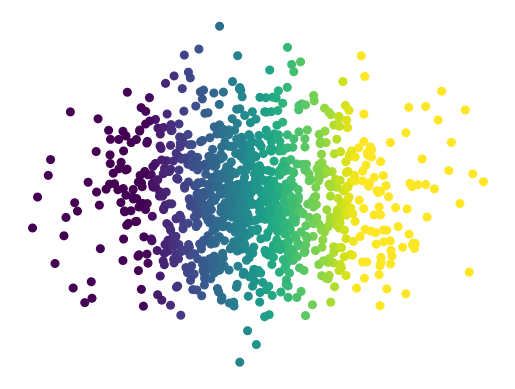

In [66]:
show_scatterplot(X)

3. Explain briefly the Singular value decomposition (SVD)

Singular value decomposition is the fact that every matrix can be decomposed as follow: M=UDV where U and V are orthogonals and diagonal values of D are positives 

4. Explain the relation between rotation and orthogonal matrices

A rotation matrix is a orthogonal matrix. However a orthogonal matrix is not necessarly a rotation one.

5. Explain the relation between scaling and diagonal matrices

Scaling and diagonal matrices are the same things

6. Compute 10 linear transformations suing several random matrices $W$ of size (2,2).

    For each transformation, compute the SVD of W, and visualize the transformed point cloud $Y$ with its corresponding singular values $(s_1,s_2)$.


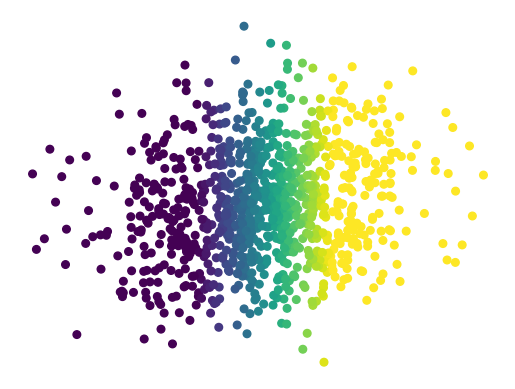

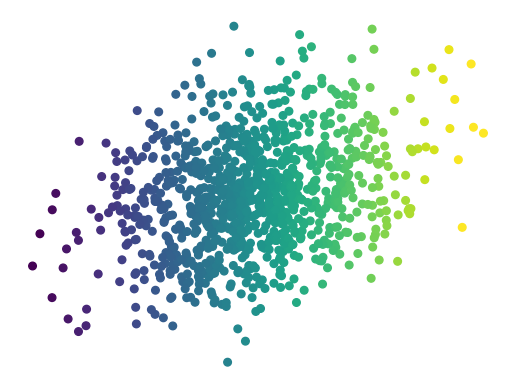

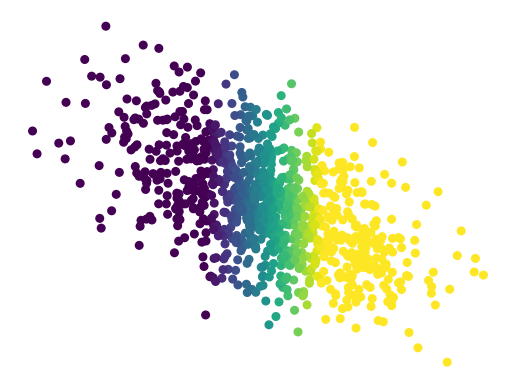

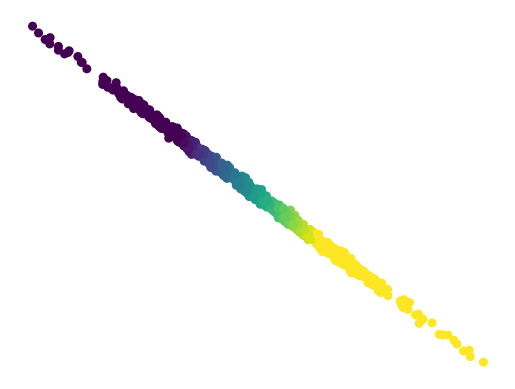

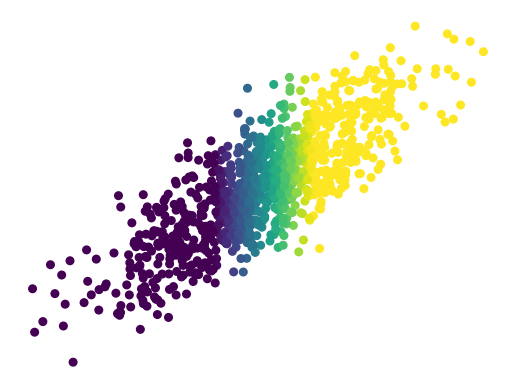

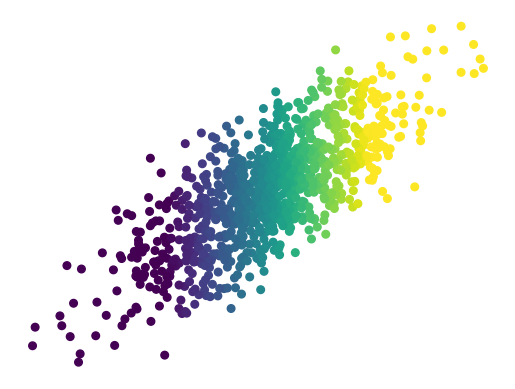

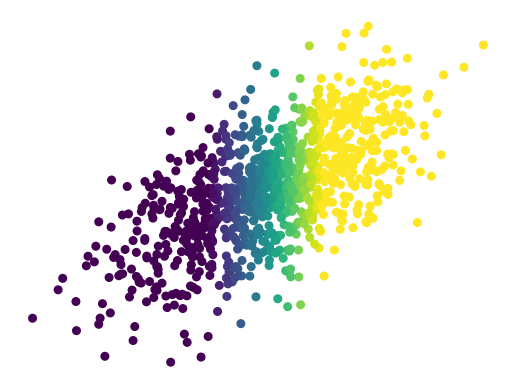

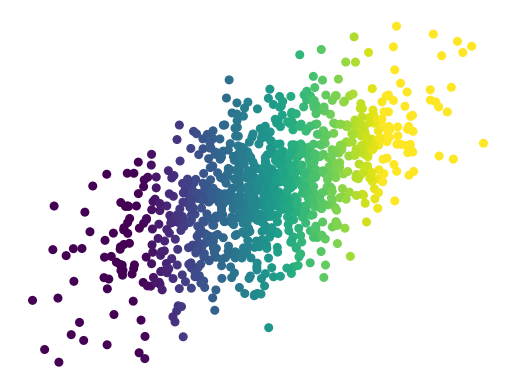

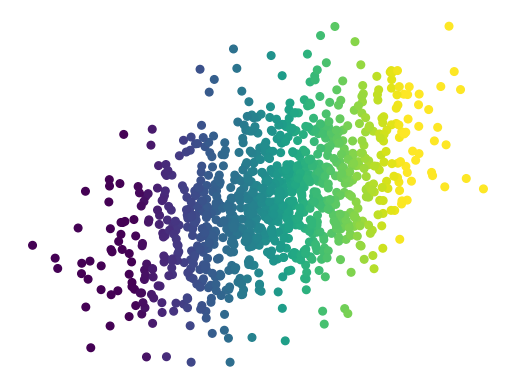

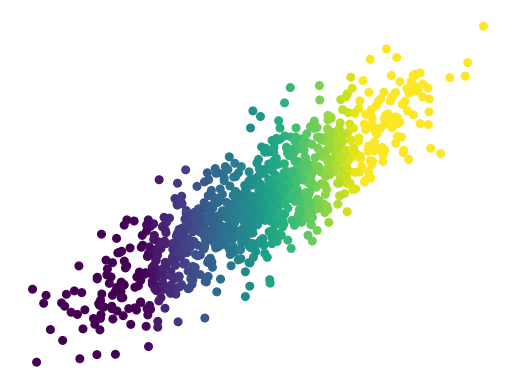

In [67]:
#fig,ax=plt.subplots(2,5,figsize=(12,6))
for i in range(10):
    w=torch.randn((2,2)).to(device)
    u,s,v=torch.linalg.svd(w)
    y=X@w
    show_scatterplot(y)
    

7. Analyse the results.

The results are very beautiful.

# Linear transformation with PyTorch’s nn.Linear class.

8. Compute a similar linear transformation with PyTorch’s nn.Linear class and visualize the transfomed point cloud $Y$.

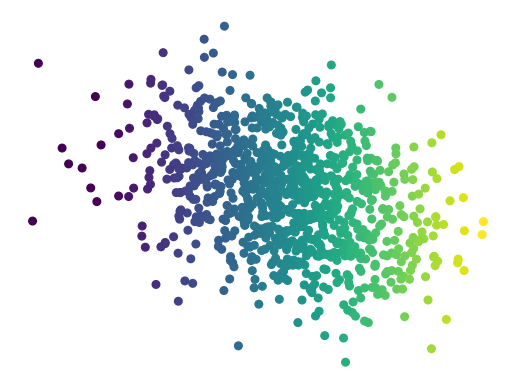

In [40]:
w=nn.Linear(2,2).to(device)
y=w(X)
y=y.detach()
show_scatterplot(y)

# Non-linear transformations

9. Plot the graph of the hyperbolic tangent function (tanh). What do you notice about it ?

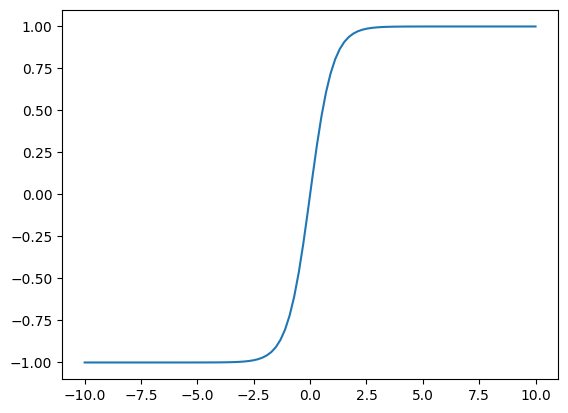

In [44]:
Th=nn.Tanh()
x=np.linspace(-10,10,100)
x=torch.tensor(x)
th=Th(x)
plt.plot(x,th)

10. For s=1,...,5. 
    Compute a linear transformation with PyTorch’s nn.Linear class (the transformation matrix must be a $2*2$ diagonal matrix, with diagonal elements all equal to s), followed by a non-linear transformation using tanh. Visualise the results.

In [52]:
Th(X).shape

torch.Size([1000, 2])

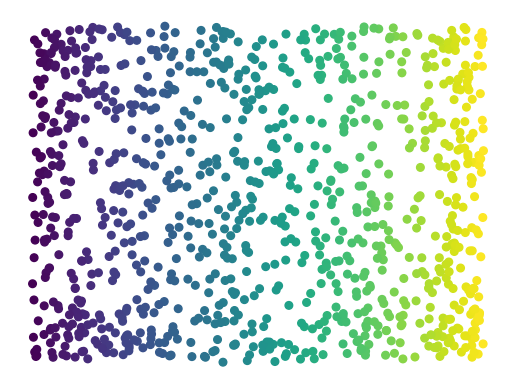

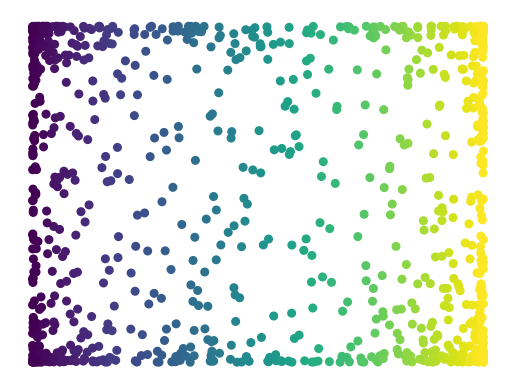

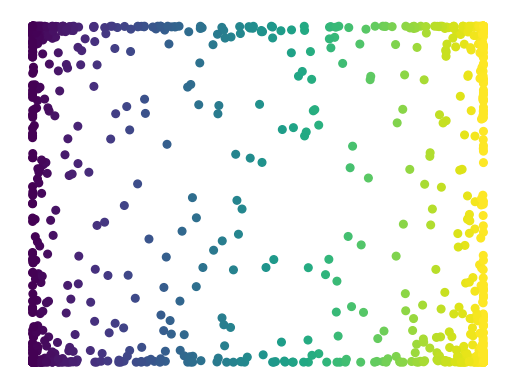

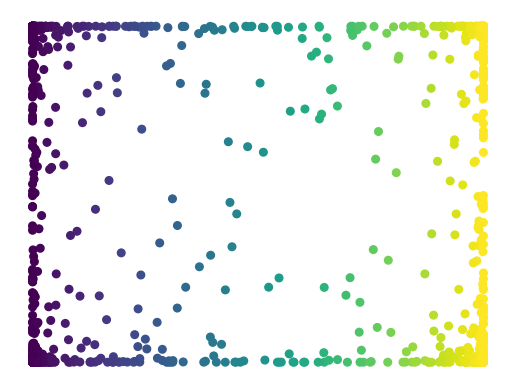

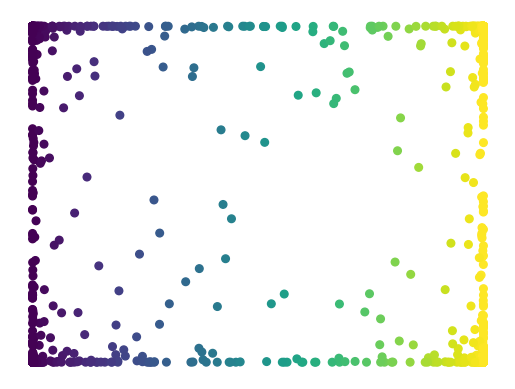

In [68]:
for s in range(1,6):
    diag=nn.Linear(2,2,bias=False)
    diag.weight.data=s*torch.diag(torch.ones(2))
    y=diag(X)
   
    y=Th(y)
    y=y.detach()
    
    show_scatterplot(y)

11. Analyse the results
    

this transformations seperate the classes

# Transformations performed by a random neural net

12. Compute the Network transformation consisting of a linear layer, which performs an affine transformation, followed by a
hyperbolic tangent non-linearity, and finally another linear layer

In [64]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1=nn.Linear(2,2)
        self.tanh=nn.Tanh()
        self.linear2=nn.Linear(2,2)

    def forward(self,x):
        out=self.linear1(x)
        out=self.tanh(out)
        out=self.linear2(out)

13. Answer to the above question using a deeper neural network

In [14]:
from sklearn.datasets import fetch_openml
X,target=fetch_openml('shapes',return_X_y=True)
x=X.drop(columns='target',axis=1)
x=x.to_numpy()

/home/ing/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


/tmp/ipykernel_194964/3412989636.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x=torch.tensor(x)


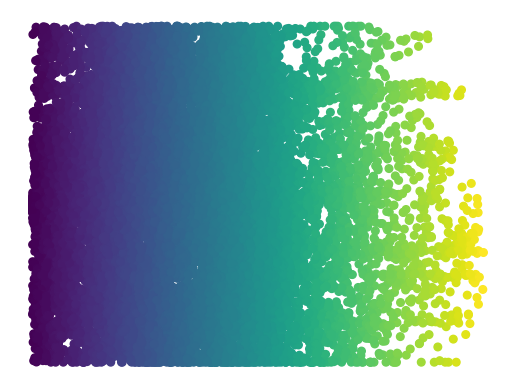

In [17]:
x=torch.tensor(x)
show_scatterplot(x)